# Examples: `image` 

[In progress]

In [1]:
import sys
sys.path.append('..')

from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import psdist.bunch as psd
import psdist.image as psi
import psdist.plotting as psp
from psdist import utils

In [2]:
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'viridis'
pplt.rc['figure.facecolor'] = 'white'
pplt.rc['grid'] = False

## 2D image 

In [3]:
res = 50
state = np.random.RandomState(1951)
xx = np.linspace(-5.0, 5.0, res)
X, Y = np.meshgrid(xx, xx, indexing='ij')
f = np.zeros((res, res))
for _ in range(4):
    sig = state.uniform(0.5, 1.5, size=2)
    mu = state.uniform(-2.0, 2.0, size=2)
    f += np.exp(-0.5 * (((X - mu[0]) / sig[0])**2 + ((Y - mu[1]) / sig[1])**2))
f = f + 0.01 * np.max(f)
f = f / np.max(f)

In [4]:
@interact(thresh=(-5.0, 0.0))
def update(thresh):
    fig, ax = pplt.subplots()
    ax = psp.image(
        f, x=xx, y=xx, ax=ax,
        profx=True, profy=True,
        thresh=10.0**thresh, 
        rms_ellipse=True, 
        rms_ellipse_kws=dict(color='white'), 
        colorbar=True,
        norm='log',
        vmax=1.0,
    )

interactive(children=(FloatSlider(value=-2.5, description='thresh', max=0.0, min=-5.0), Output()), _dom_classe…

## ND image 

In [5]:
res = 50
n = 4
dims = ['x', 'xp', 'y', 'yp']

shape = tuple(n * [res])
xmax = 7.0
coords = n * [np.linspace(-xmax, xmax, res)]
COORDS = np.meshgrid(*coords, indexing='ij')
f = np.zeros(shape)
for _ in range(12):
    sig = state.uniform(0.5, 1.5, size=n)
    mu = state.uniform(-3.0, 3.0, size=n)
    argument = np.zeros(shape)
    for i in range(n):
        argument += ((COORDS[i] - mu[i]) / sig[i])**2
    f += np.exp(-0.5 * argument)
f = f + 0.0001 * np.max(f)
f = f / np.max(f)

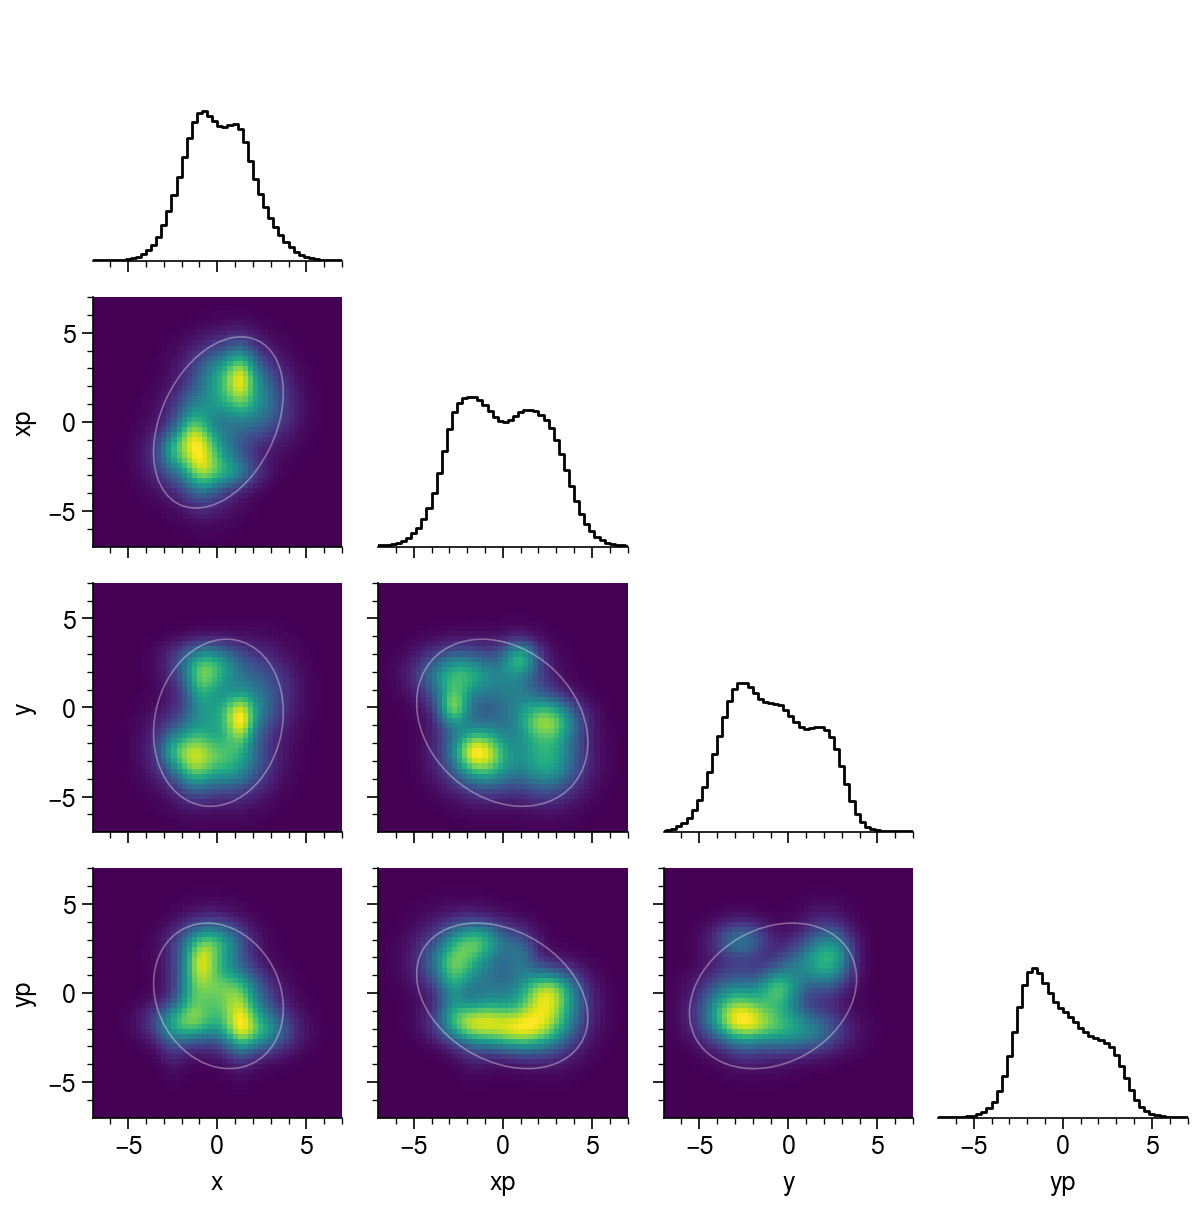

In [6]:
axes = psp.corner(
    data=f,
    coords=coords,
    diag_kind='step',
    prof=False,
    labels=dims,
    rms_ellipse=True,
    rms_ellipse_kws=dict(color='white', alpha=0.35, level=2.0),
    norm=None,
)

In [7]:
psp.interactive_proj1d(f, coords=coords, dims=dims)

interactive(children=(Dropdown(description='dim', options=('x', 'xp', 'y', 'yp'), value='x'), Checkbox(value=F…

In [8]:
psp.interactive_proj2d(f, coords=coords, dims=dims)

interactive(children=(Dropdown(description='cmap', options=('viridis', 'dusk_r', 'mono_r', 'plasma'), value='v…